# 3. 인공지능과 가위바위보 하기 [프로젝트]

# 3-1. 미니 프로젝트: 가위바위보 분류기를 만들자

**라이브러리 버전을 확인해 보기**

사용한 라이브러리 버전을 둘러본다.

In [47]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


다운로드 받은 이미지의 크기: 224x224

**데이터 불러오기 + Resize 하기**

숫자 손글씨의 경우 이미지 크기가 28x28 이었기 때문에, 우리의 가위, 바위, 보 이미지도 28x28로 만들어야 한다. 

이를 위해서는 PIL 라이브러리를 사용

In [48]:
# 라이브러리 불러오기
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [49]:
# 가위 이미지 resize
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [50]:
# 바위 이미지 resize
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [51]:
# 보 이미지 resize
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [52]:
# load_data()함수 만들기
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


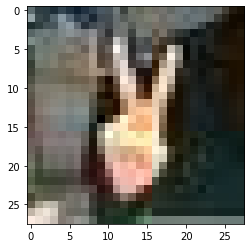

In [53]:
# 이미지 불러오기
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

**딥러닝 네트워크 설계하기**

In [54]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3))) # 3x3 필터로 입력된 이미지의 16개의 특징을 뽑아냄
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu')) # 3x3 필터로 입력된 이미지의 16개의 특징을 뽑아냄
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu')) # 분류기에 사용되는 뉴런의 수(복잡한 문제일수록 이 수를 늘린다.)
model.add(keras.layers.Dense(3, activation='softmax')) # 0~9까지의 (총 10개) 분류해야 하는 클래스 수

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

**딥러닝 네트워크 학습시키기**

In [55]:
# 모델 훈련
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 18ms/step - loss: 16.4094 - accuracy: 0.5600
Epoch 2/10
10/10 [==============================] - 0s 21ms/step - loss: 0.6256 - accuracy: 0.9300
Epoch 3/10
10/10 [==============================] - 0s 21ms/step - loss: 0.1858 - accuracy: 0.9833
Epoch 4/10
10/10 [==============================] - 0s 18ms/step - loss: 0.0092 - accuracy: 0.9967
Epoch 5/10
10/10 [==============================] - 0s 21ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 0s 21ms/step - loss: 3.0445e-05 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 21ms/step - loss: 2.2172e-05 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 21ms/step - loss: 3.1158e-05 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 20ms/step - loss: 2.9137e-05 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 21ms/step - loss: 2.4169e-05 - accur

**테스트용 데이터 만들기**

In [56]:
# 가위 이미지 resize
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [57]:
# 바위 이미지 resize
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [58]:
# 보 이미지 resize
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [59]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [60]:
# test_accuracy 측정
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 19.8655 - accuracy: 0.3200
test_loss: 19.865474700927734
test_accuracy: 0.3199999928474426


**어떤 데이터를 잘못 추론했을까? 눈으로 확인해 보자**

model.evaluate() 대신 model.predict()를 사용하면 model이 입력값을 보고 실제로 추론한 확률분포를 출력할 수 있다. 우리가 만든 model이란 사실 10개의 숫자 중 어느 것일지에 대한 확률값을 출력하는 함수이다. 이 함수의 출력값, 즉 확률값이 가장 높은 숫자가 바로 model이 추론한 숫자가 되는 것이다.

In [61]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [1.4007624e-11 9.9949419e-01 5.0572905e-04]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


model.predict() 결과가 벡터 형태로 나왔다. 이 벡터는 model이 추론한 결과가 각각 가위, 바위 보일 확률을 의미한다.

이 경우라면 model이 추론한 결과가 보일 확률이 1.00에 근접하고 있다, 즉 이 model은 입력한 이미지가 보라는 걸 아주 확신하고 있다는 뜻이 된다.

정말 보일까?

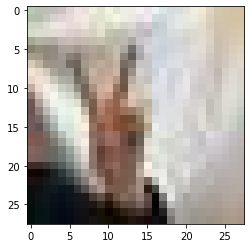

In [62]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [5.6270686e-15 1.0000000e+00 3.3366566e-19]
라벨: 2, 예측결과: 1


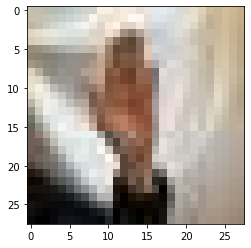

예측확률분포: [9.3649456e-11 9.9999869e-01 1.3374034e-06]
라벨: 0, 예측결과: 1


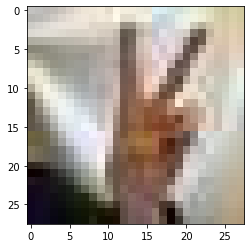

예측확률분포: [1.9939469e-13 1.0000000e+00 1.5073400e-16]
라벨: 2, 예측결과: 1


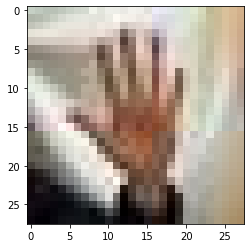

예측확률분포: [1.3034898e-15 1.0000000e+00 9.0247861e-21]
라벨: 2, 예측결과: 1


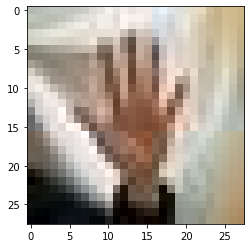

예측확률분포: [4.1164552e-13 1.0000000e+00 3.7363277e-16]
라벨: 2, 예측결과: 1


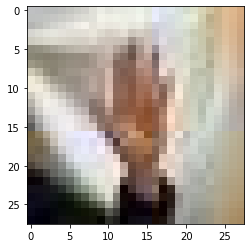

In [63]:
# model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우는 어떤 경우인지 직접 확인
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

틀린 경우를 살펴보면 model도 추론 결과에 대한 확신도가 낮고 매우 혼란스러워 한다는 것을 알 수 있다. model의 추론 결과를 시각화하여 살펴보는 것은 향후 model 성능 개선에 도움이 되는 아이디어를 얻을 수 있는 좋은 방법 중 하나이다.

## 성능 높이기!

* 특징 수를 16 -> 32, 32 -> 64
* 뉴런 수를 늘림
* Dropout Layer 추가 (과적합을 줄이기 위함)

In [64]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3))) # 3x3 필터로 입력된 이미지의 16개의 특징을 뽑아냄
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu')) # 3x3 필터로 입력된 이미지의 16개의 특징을 뽑아냄
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu')) # 분류기에 사용되는 뉴런의 수(복잡한 문제일수록 이 수를 늘린다.)
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax')) # 0~9까지의 (총 10개) 분류해야 하는 클래스 수

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               204928    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [81]:
# 모델 컴파일
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 데이터 전처리 및 학습 과정에서 사용할 배치 크기 설정
batch_size = 32  # 배치 크기를 32로 설정 (조절 가능)

# 모델 훈련
model.fit(x_train, y_train, epochs=10)


Epoch 1/10
10/10 [==============================] - 1s 32ms/step - loss: 37.7198 - accuracy: 0.4633
Epoch 2/10
10/10 [==============================] - 0s 37ms/step - loss: 2.6074 - accuracy: 0.7800
Epoch 3/10
10/10 [==============================] - 0s 38ms/step - loss: 0.3137 - accuracy: 0.9400
Epoch 4/10
10/10 [==============================] - 0s 33ms/step - loss: 0.1473 - accuracy: 0.9800
Epoch 5/10
10/10 [==============================] - 0s 35ms/step - loss: 0.1025 - accuracy: 0.9767
Epoch 6/10
10/10 [==============================] - 0s 34ms/step - loss: 0.0324 - accuracy: 0.9933
Epoch 7/10
10/10 [==============================] - 0s 35ms/step - loss: 0.0662 - accuracy: 0.9833
Epoch 8/10
10/10 [==============================] - 0s 35ms/step - loss: 0.0373 - accuracy: 0.9867
Epoch 9/10
10/10 [==============================] - 0s 35ms/step - loss: 0.0389 - accuracy: 0.9900
Epoch 10/10
10/10 [==============================] - 0s 38ms/step - loss: 0.0208 - accuracy: 0.9933


In [82]:
# test_accuracy 측정
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 18.7479 - accuracy: 0.3333
test_loss: 18.747940063476562
test_accuracy: 0.3333333432674408


# 회고문

좌절스럽습니다.. ㅠㅠ 데이터수를 늘리고 싶었는데.. 주피터 노트북에서 다른 사람의 데이터를 불러오면서 파일 이름이 겹친다는 문제가 생겼습니다. 그 부분을 해결하지 못 했는데.. 데이터를 늘렸어야 하는 게 맞는 것 같아요 ㅠㅠ
그 부분을 해결하지 못 해서 다양한 시도를 해보지 못 했습니다.
